# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 100)
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")

# Ingest Data  

In [2]:
df = pd.read_excel("World military power.xlsx", header=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

# EDA

## Implement basic steps to see how is your data looks like

In [4]:
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                         1.3444       Afghanistan   
1           Albania                         2.3137           Albania   
2           Algeria                         0.4659           Algeria   
3            Angola                         0.8379            Angola   
4         Argentina                         0.6521         Argentina   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   
3                      295                       Angola   
4                      227                    Argentina   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   
3                                  72                   Angola   
4                                  24                Argentina   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   
3                            47                    Angola   
4                            64                 Argentina   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   
3                              126                           Angola   
4                              100                        Argentina   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   
3                                      15        Angola                  379   
4                                       0     Argentina                  370   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   
3           Angola                     595                            Angola   
4        Argentina                     739                         Argentina   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2     

In [5]:
df.shape

(138, 60)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum().any()

True

## Detect and drop duplicated columns

In [8]:
df.insert(0, "Country",df["Military Strength"])

In [9]:
df.drop(columns = df.iloc[:,1:60:2], inplace = True)

In [10]:
df.head()

Country  Military Strength Power Index  Aircraft Strength value  \
0  Afghanistan                         1.3444                      260   
1      Albania                         2.3137                       19   
2      Algeria                         0.4659                      551   
3       Angola                         0.8379                      295   
4    Argentina                         0.6521                      227   

   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   Tank Strength value  AFV/APC Strength value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   Rocket Projector Strength value  Navy Fleet Strengths value  \
0                               50                         0.0   
1                                0                        38.0   
2                              316                       201.0   
3                              115                        57.0   
4                               26                        49.0   

   Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             6.0   
3                                    0.0                             0.0   
4                                    0.0                             2.0   

   Destroyer Fleet Strength value  Frigate Fleet Strength value  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           5.0   
3                             0.0                           0.0   
4                             4.0                           0.0   

  defense spending budget value External Debt value  Airport Totals value  \
0               12,00,00,00,000      2,84,00,00,000                    43   
1               

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Check for missing values 

In [12]:
null_columns=df.columns[df.isnull().any()]

In [13]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

Missing_Number  Missing_Percent
Total Coastline Coverage value                       29         0.210145
Aircraft Carrier Fleet Strength value                23         0.166667
Frigate Fleet Strength value                         23         0.166667
Destroyer Fleet Strength value                       23         0.166667
Submarine Fleet Strength value                       23         0.166667
Navy Fleet Strengths value                           14         0.101449
Total Border Coverage value                           9         0.065217
Helicopter Fleet Strength value                       0         0.000000
Attack Helicopter Fleet Strength value                0         0.000000
Total Waterway Coverage value                         0         0.000000
Aircraft Strength value                               0         0.000000
Total Square Land Area value                          0         0.000000
Total Population value                                0         0.000000
Available Manpower value                              0         0.000000
Proven Oil Reserves value                             0         0.000000
Oil Consumption value                                 0         0.000000
Oil Production value                                  0         0.000000
Airport Totals value                                  0         0.000000
External Debt value                                   0         0.000000
defense spending budget value                         0         0.000000
Fighter/Interceptor Strength value                    0         0.000000
Attack Aircraft Strength value                        0         0.000000
Transport Aircraft Fleet Strength value               0         0.000000
Military Strength Power Index                         0         0.000000
Trainer Aircraft Fleet value                          0         0.000000
Rocket Projector Strength value                       0         0.000000
Towed Artillery Strength value                        0         0.000000
Self-Propelled Artillery Strength value               0         0.000000
AFV/APC Strength value                                0         0.000000
Tank Strength value                                   0         0.000000
Country                                               0         0.000000

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

 - submarine_fleet_strength_value of South Korea: 22
 - frigate_fleet_strength_value of South Korea  : 4
 - destroyer_fleet_strength_value of South Korea: 12
 - All other missing values are :  0
 ### References:
             https://www.globalfirepower.com/navy-submarines.php
             https://www.globalfirepower.com/navy-frigates.php
             https://www.globalfirepower.com/navy-destroyers.php

In [14]:
df.loc[df["Total Coastline Coverage value"].isnull(), 
    ['Country','Navy Fleet Strengths value','Aircraft Carrier Fleet Strength value','Submarine Fleet Strength value',
     'Destroyer Fleet Strength value','Frigate Fleet Strength value','Total Waterway Coverage value']]

Country  Navy Fleet Strengths value  \
5                     Armenia                         0.0   
7                     Austria                         0.0   
11                    Belarus                         0.0   
13                     Bhutan                         0.0   
14                    Bolivia                       173.0   
16                   Botswana                         NaN   
19               Burkina Faso                         NaN   
23   Central African Republic                         NaN   
24                       Chad                         NaN   
30                    Czechia                         NaN   
38                   Ethiopia                         NaN   
48                    Hungary                         NaN   
62                 Kyrgyzstan                         NaN   
63                       Laos                        36.0   
71                       Mali                         NaN   
74                    Moldova                         NaN   
75                   Mongolia                         NaN   
81                      Nepal                         NaN   
85                      Niger                         NaN   
88            North Macedonia                         NaN   
93                   Paraguay                        40.0   
103                    Serbia                        19.0   
106                  Slovakia                         0.0   
111               South Sudan                         0.0   
117               Switzerland                         0.0   
120                Tajikistan                         0.0   
126                    Uganda                         8.0   
136                    Zambia                         0.0   
137                  Zimbabwe                         0.0   

     Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  \
5                                      NaN                             NaN   
7                                      NaN                             NaN   
11                                     NaN                             NaN   
13                                     NaN                             NaN   
14                                     0.0                             0.0   
16                                     NaN                             NaN   
19                                     NaN                             NaN   
23                                     NaN                             NaN   
24                                     NaN                             NaN   
30                                     NaN                             NaN   
38                                     NaN                             NaN   
48                                     NaN                             NaN   
62                                     NaN                             NaN   
63                                     0.0                             0.0   
71                                     NaN                             NaN   
74                                     NaN                             NaN   
75                                     NaN                             NaN   
81                                     NaN                             NaN   
85                                     NaN                             NaN   
88                                     NaN                             NaN   
93                                     0.0                             0.0   
103                                    0.0                             0.0   
106                                    NaN                             NaN   
111                                    2.0                            22.0   
117                                    NaN                             NaN   
120                                    NaN                             NaN   
126                                    0.0                             0.0   
136    

In [15]:
df.loc[(df['Country']=="South Korea") & (df['Submarine Fleet Strength value'].isnull()), 'Submarine Fleet Strength value'] = 22
df.loc[(df['Country']=="South Korea") & (df['Frigate Fleet Strength value'].isnull()), 'Frigate Fleet Strength value'] = 4
df.loc[(df['Country']=="South Korea") & (df['Destroyer Fleet Strength value'].isnull()), 'Destroyer Fleet Strength value'] = 12

In [16]:
df.fillna(0, inplace=True)

In [17]:
missing(df)

Missing_Number  Missing_Percent
Country                                               0              0.0
Submarine Fleet Strength value                        0              0.0
Total Waterway Coverage value                         0              0.0
Total Coastline Coverage value                        0              0.0
Total Square Land Area value                          0              0.0
Total Population value                                0              0.0
Available Manpower value                              0              0.0
Proven Oil Reserves value                             0              0.0
Oil Consumption value                                 0              0.0
Oil Production value                                  0              0.0
Airport Totals value                                  0              0.0
External Debt value                                   0              0.0
defense spending budget value                         0              0.0
Frigate Fleet Strength value                          0              0.0
Destroyer Fleet Strength value                        0              0.0
Aircraft Carrier Fleet Strength value                 0              0.0
Military Strength Power Index                         0              0.0
Navy Fleet Strengths value                            0              0.0
Rocket Projector Strength value                       0              0.0
Towed Artillery Strength value                        0              0.0
Self-Propelled Artillery Strength value               0              0.0
AFV/APC Strength value                                0              0.0
Tank Strength value                                   0              0.0
Attack Helicopter Fleet Strength value                0              0.0
Helicopter Fleet Strength value                       0              0.0
Trainer Aircraft Fleet value                          0              0.0
Transport Aircraft Fleet Strength value               0              0.0
Attack Aircraft Strength value                        0              0.0
Fighter/Interceptor Strength value                    0              0.0
Aircraft Strength value                               0              0.0
Total Border Coverage value                           0              0.0

In [18]:
df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [19]:
df.dtypes

Country                                     object
Military Strength Power Index              float64
Aircraft Strength value                      int64
Fighter/Interceptor Strength value           int64
Attack Aircraft Strength value               int64
Transport Aircraft Fleet Strength value      int64
Trainer Aircraft Fleet value                 int64
Helicopter Fleet Strength value              int64
Attack Helicopter Fleet Strength value       int64
Tank Strength value                          int64
AFV/APC Strength value                       int64
Self-Propelled Artillery Strength value      int64
Towed Artillery Strength value               int64
Rocket Projector Strength value              int64
Navy Fleet Strengths value                 float64
Aircraft Carrier Fleet Strength value      float64
Submarine Fleet Strength value             float64
Destroyer Fleet Strength value             float64
Frigate Fleet Strength value               float64
defense spending budget value  

In [20]:
for col in df.select_dtypes("object").columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [22]:
df.drop(['Total Square Land Area value','Total Coastline Coverage value',
         'Total Waterway Coverage value',
         'Total Border Coverage value'],axis=1,inplace=True)

## Visualy inspect the some features

In [23]:
import plotly.express as px

In [24]:
df.head()

Country  Military Strength Power Index  Aircraft Strength value  \
0  Afghanistan                         1.3444                      260   
1      Albania                         2.3137                       19   
2      Algeria                         0.4659                      551   
3       Angola                         0.8379                      295   
4    Argentina                         0.6521                      227   

   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   Tank Strength value  AFV/APC Strength value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   Rocket Projector Strength value  Navy Fleet Strengths value  \
0                               50                         0.0   
1                                0                        38.0   
2                              316                       201.0   
3                              115                        57.0   
4                               26                        49.0   

   Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             6.0   
3                                    0.0                             0.0   
4                                    0.0                             2.0   

   Destroyer Fleet Strength value  Frigate Fleet Strength value  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           5.0   
3                             0.0                           0.0   
4                             4.0                           0.0   

   defense spending budget value  External Debt value  Airport Totals value  \
0                   1.200000e+10         2.840000e+09                    43   
1           

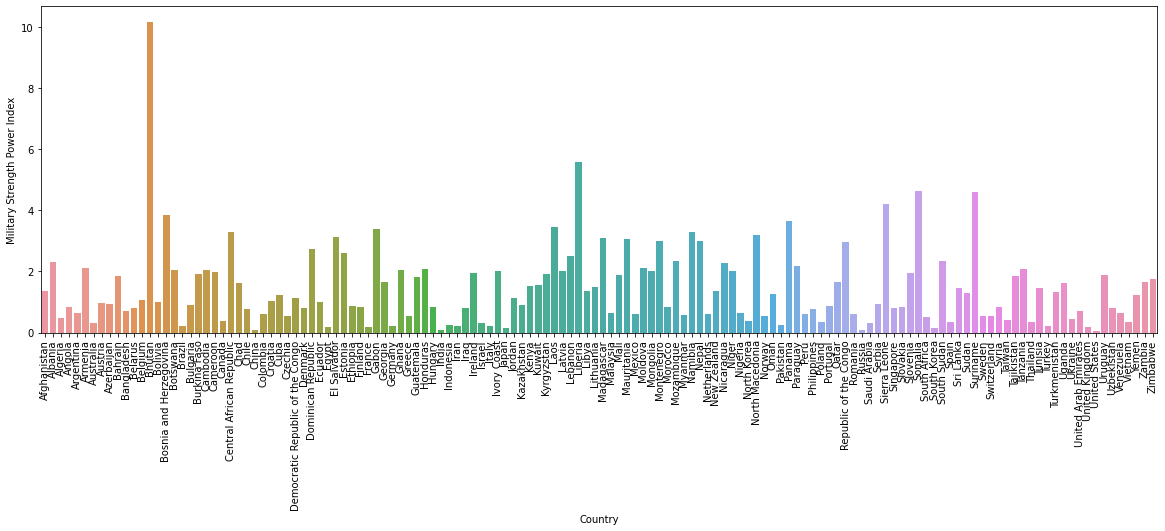

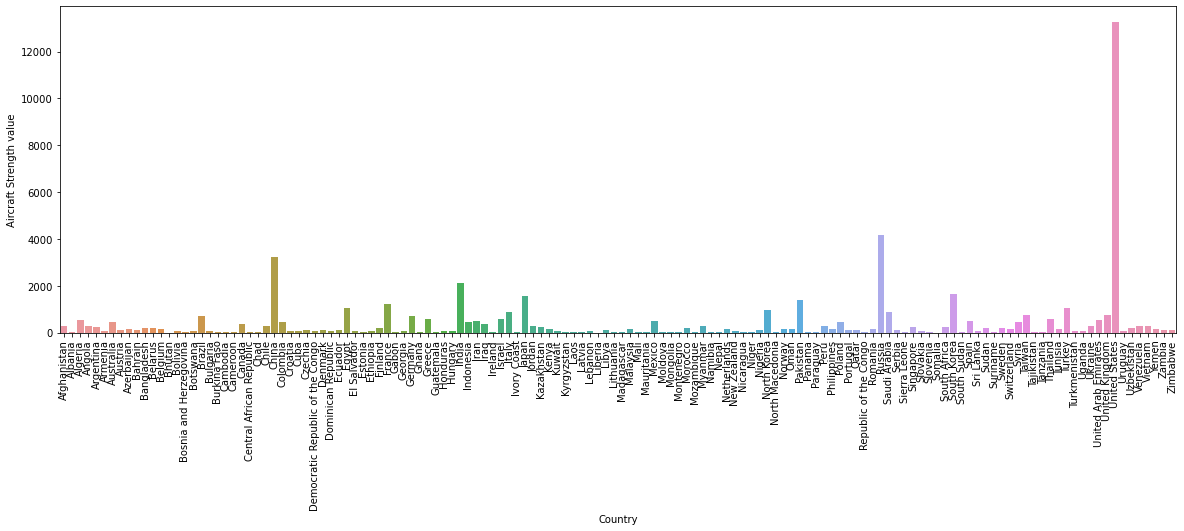

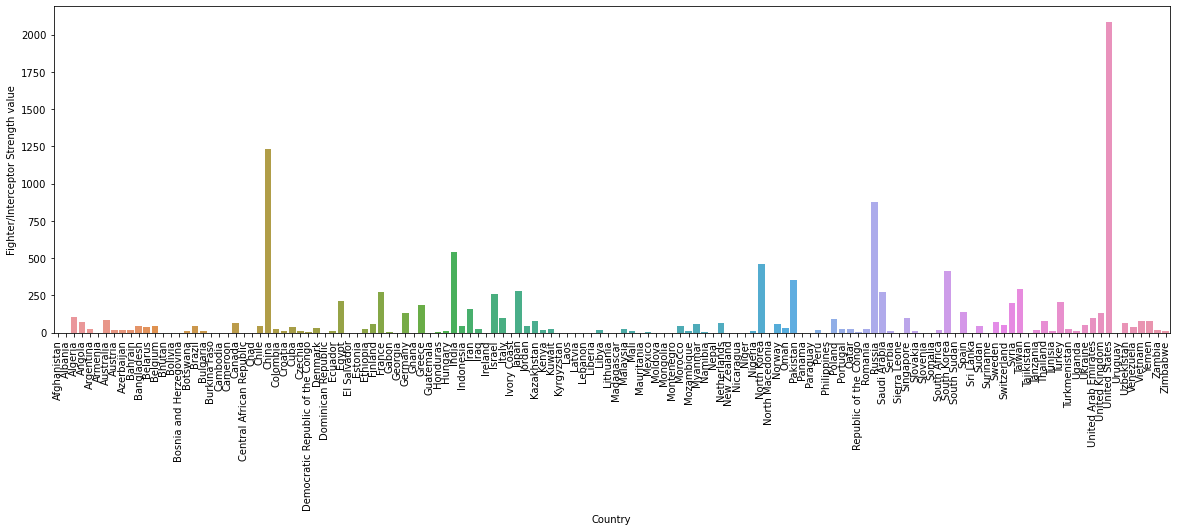

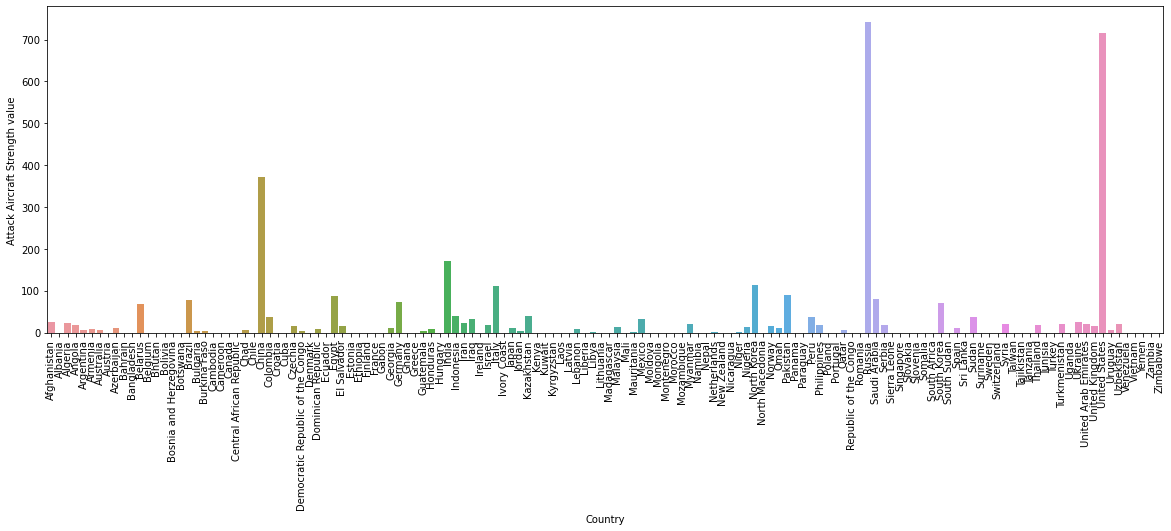

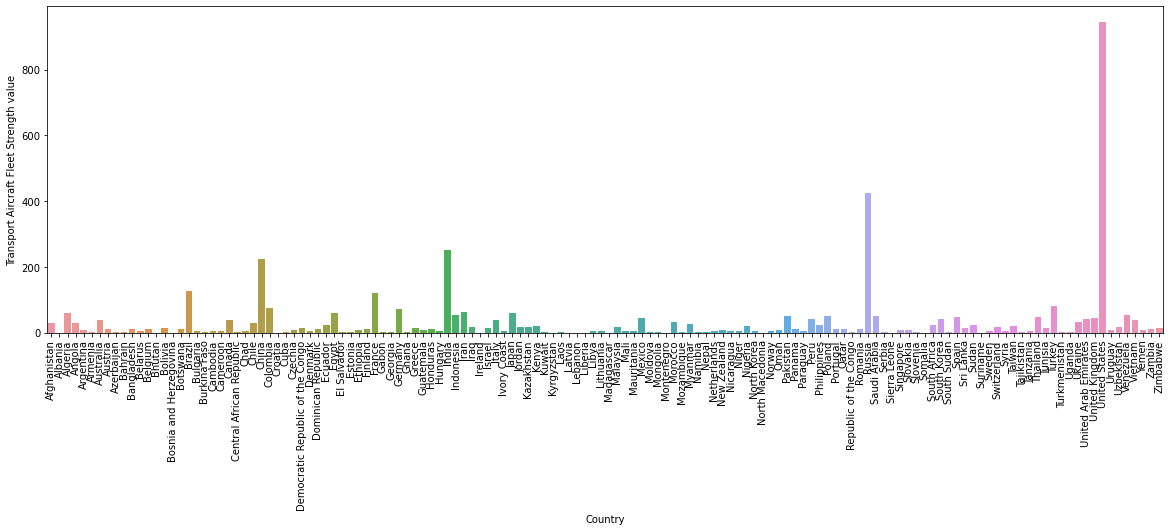

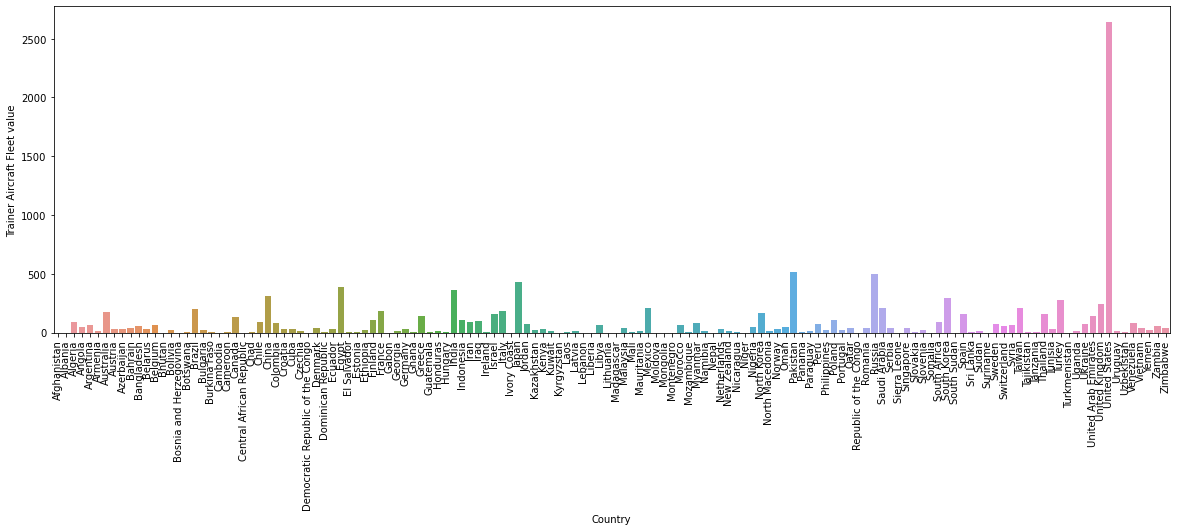

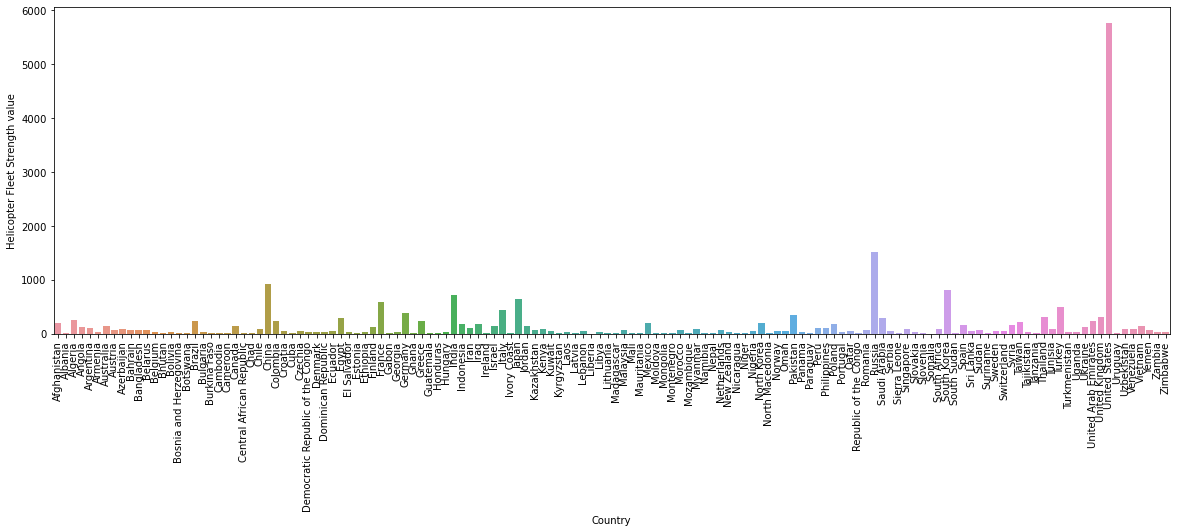

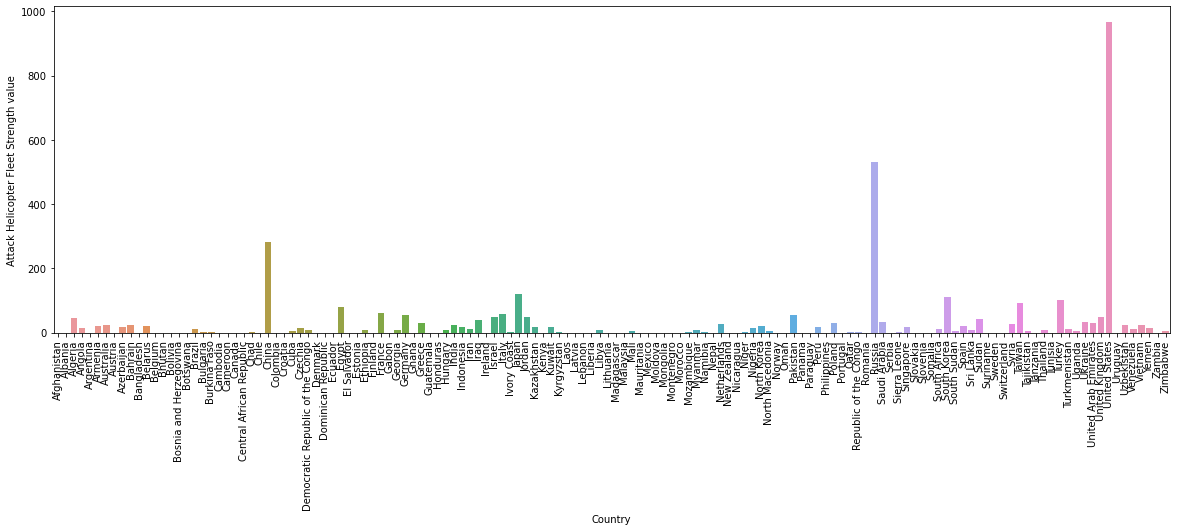

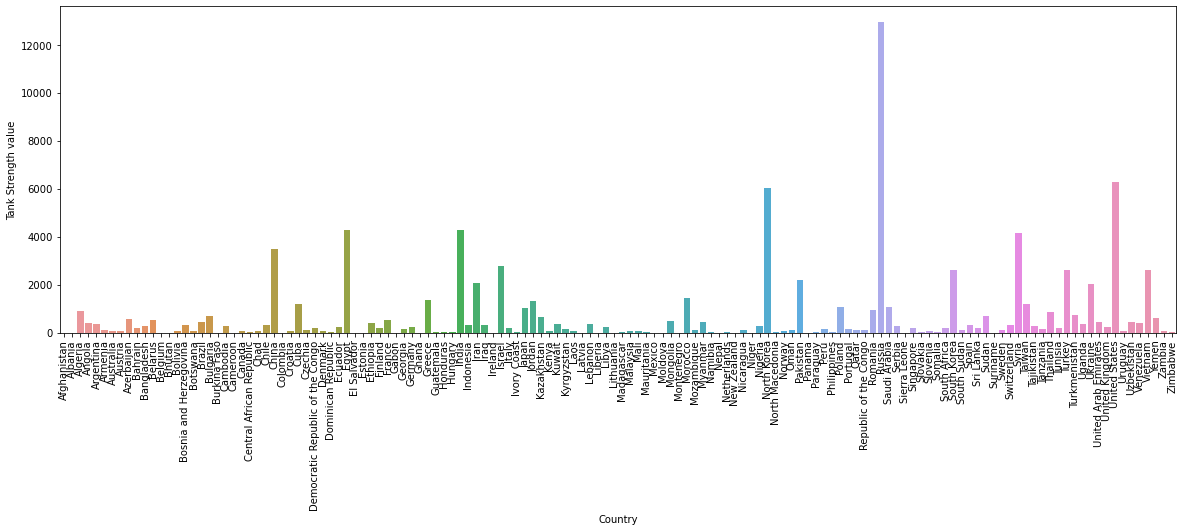

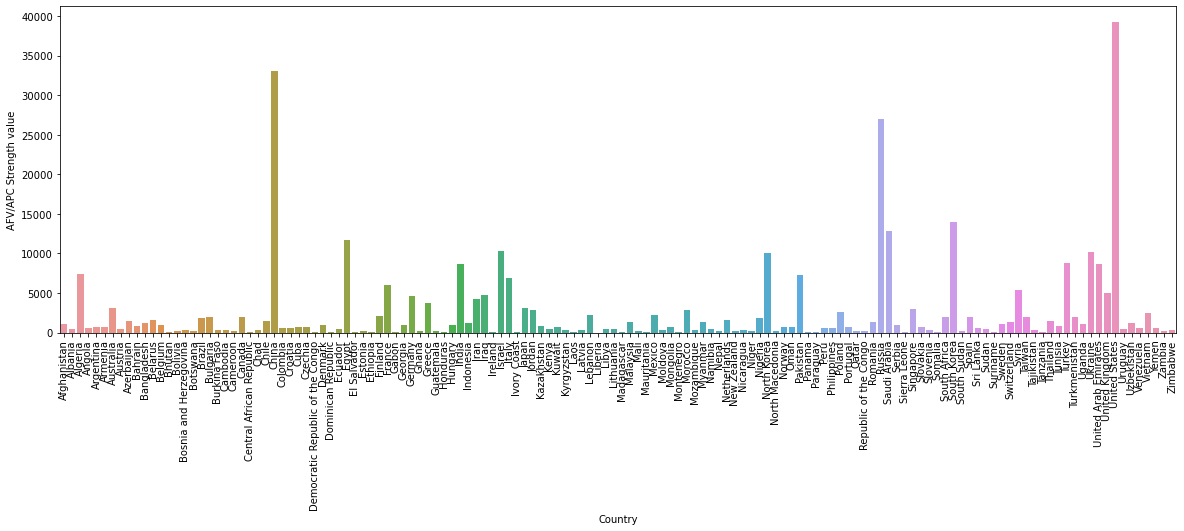

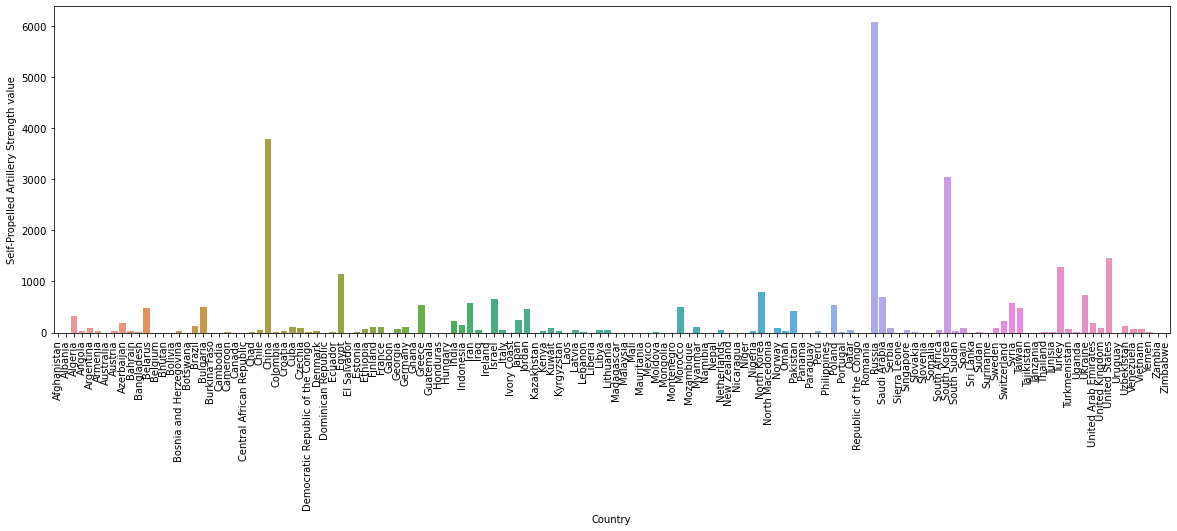

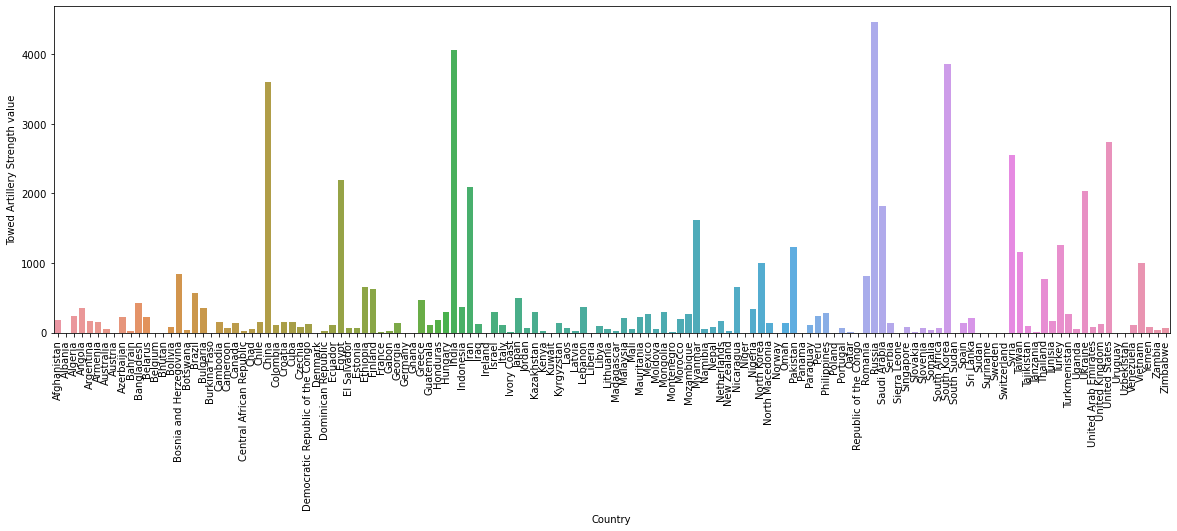

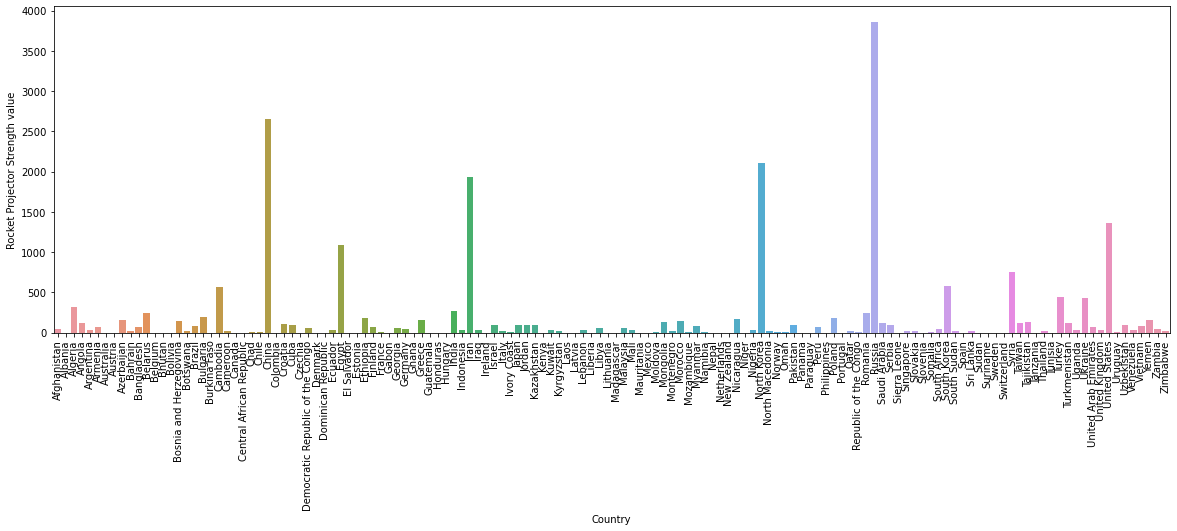

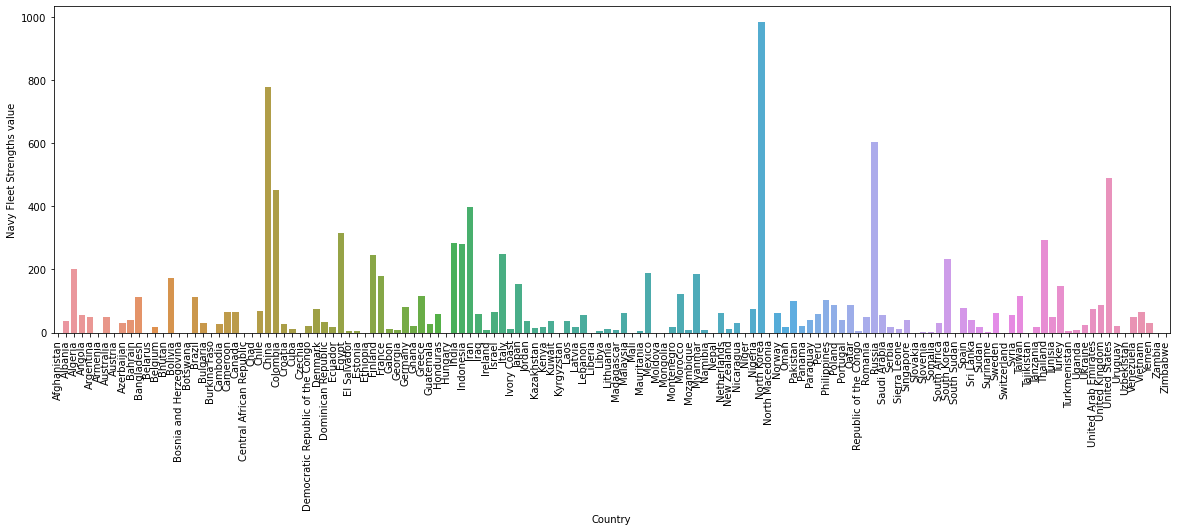

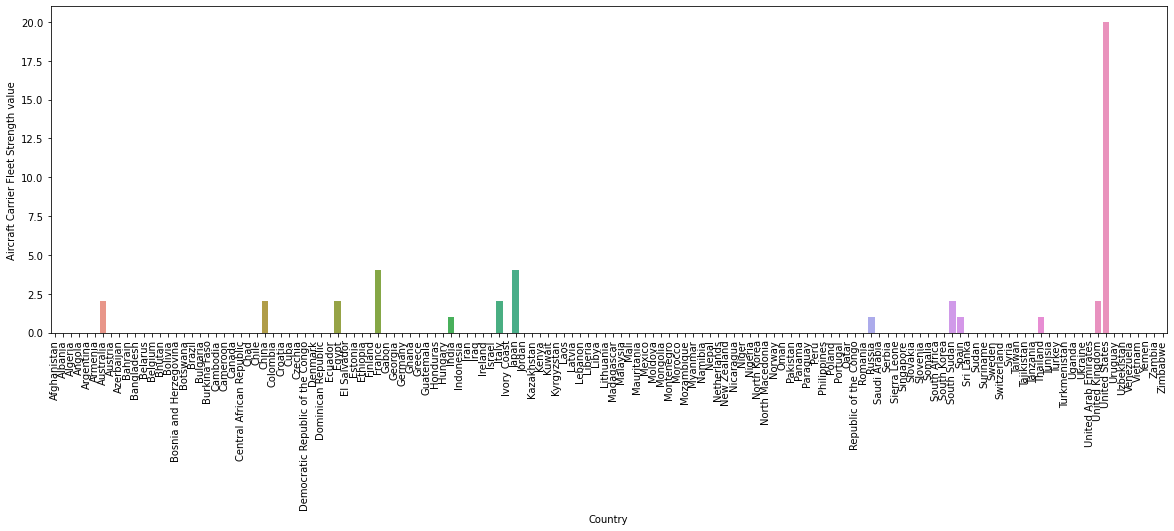

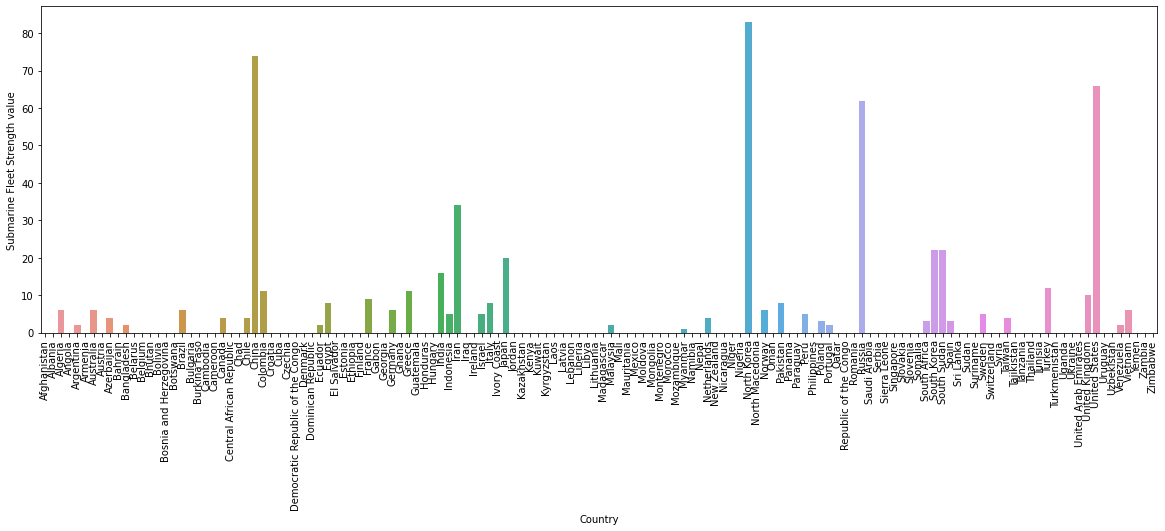

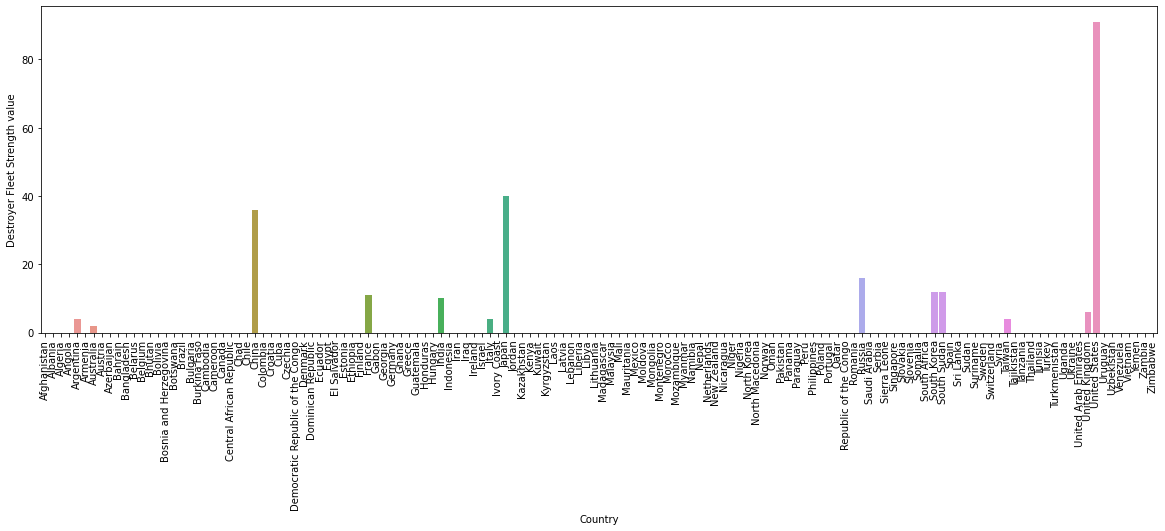

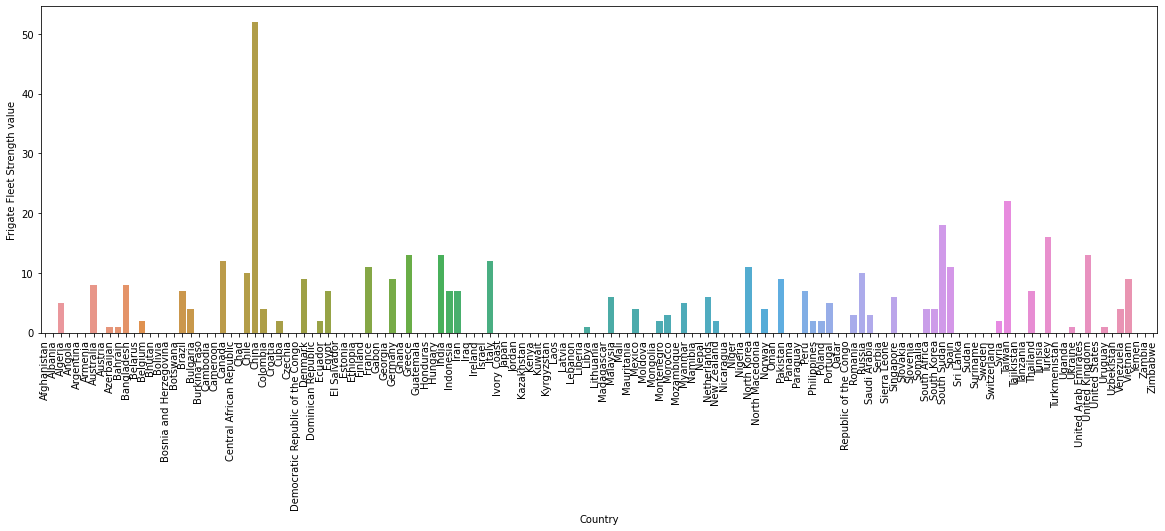

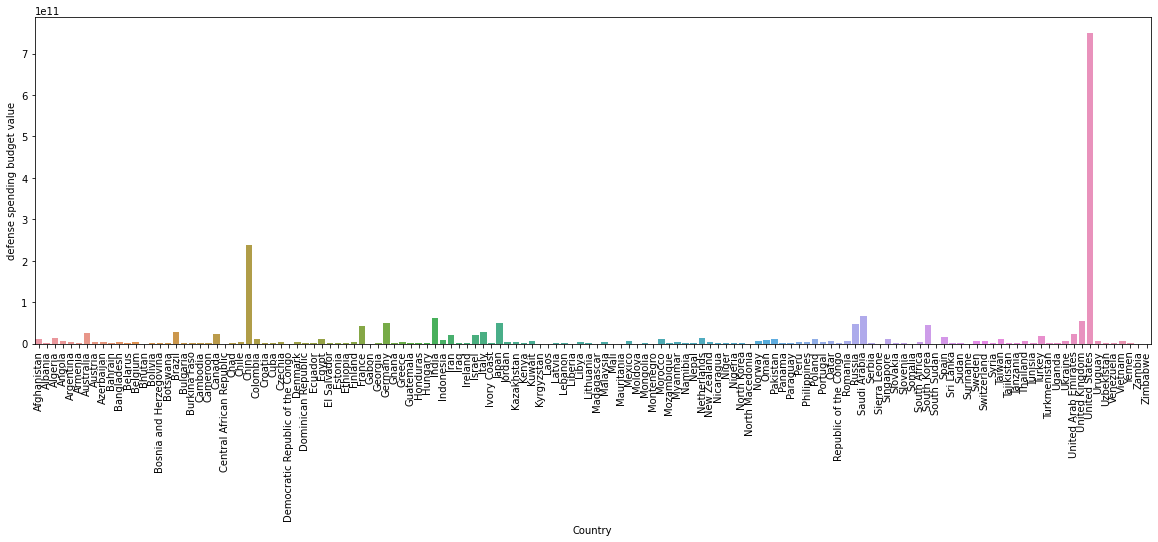

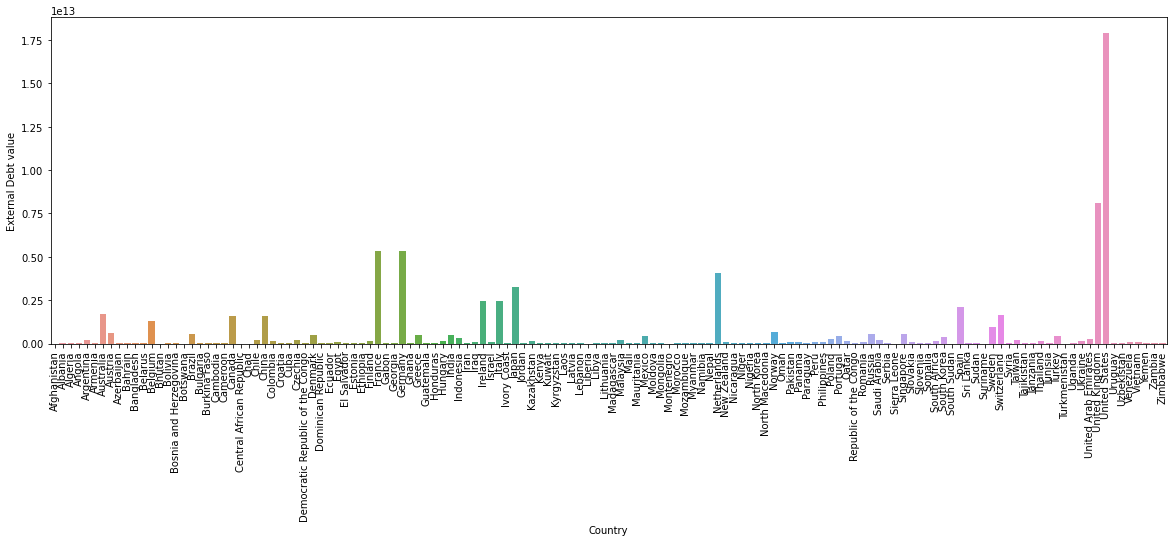

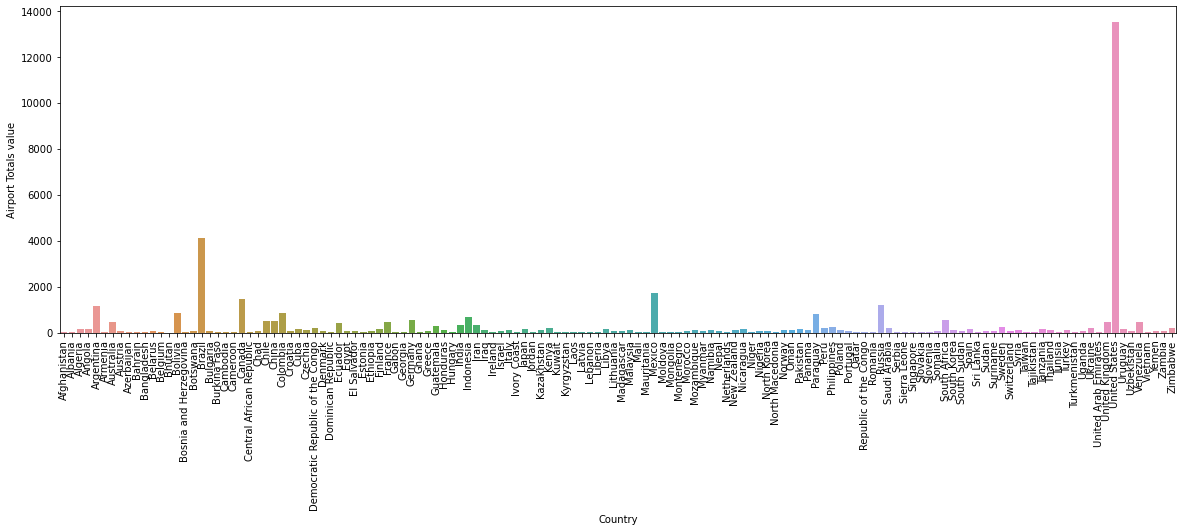

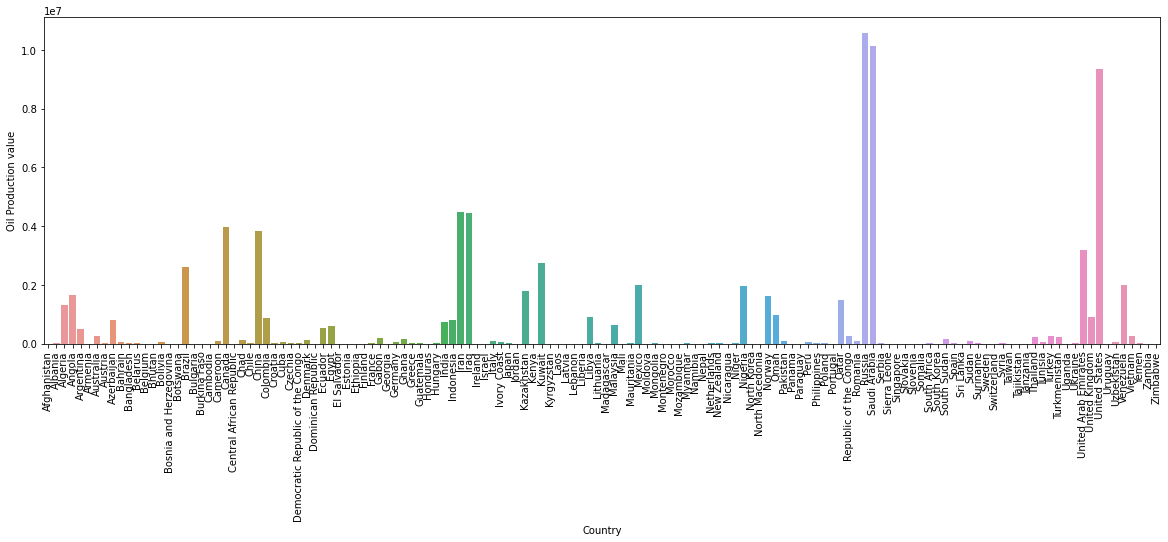

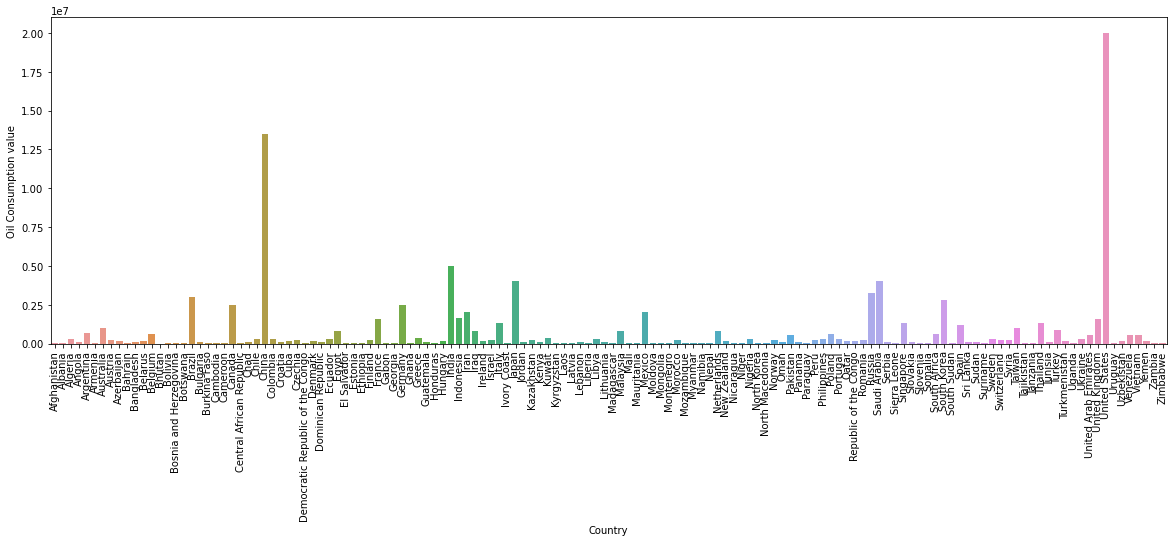

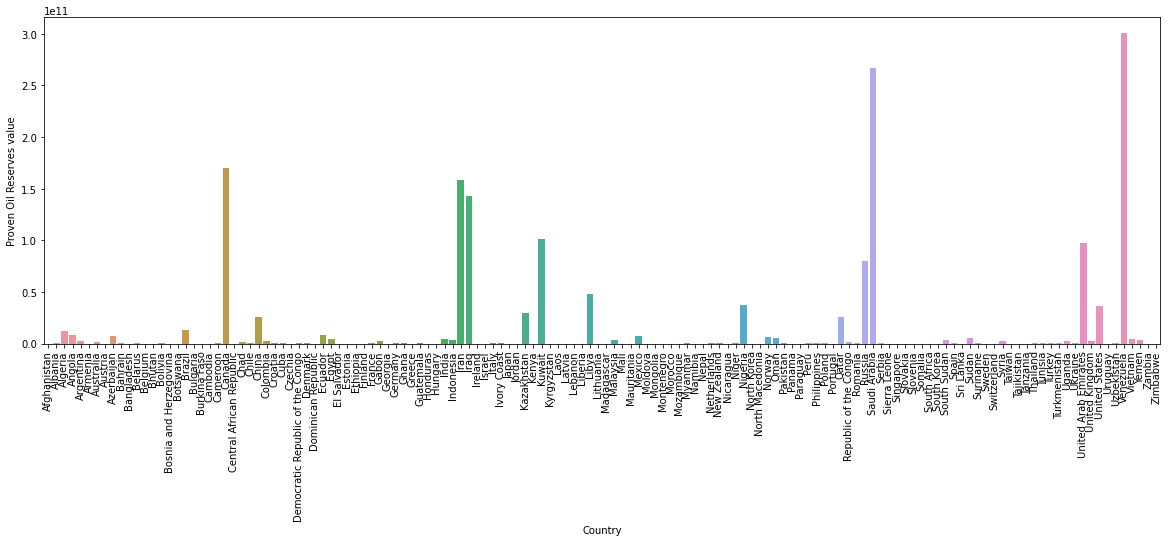

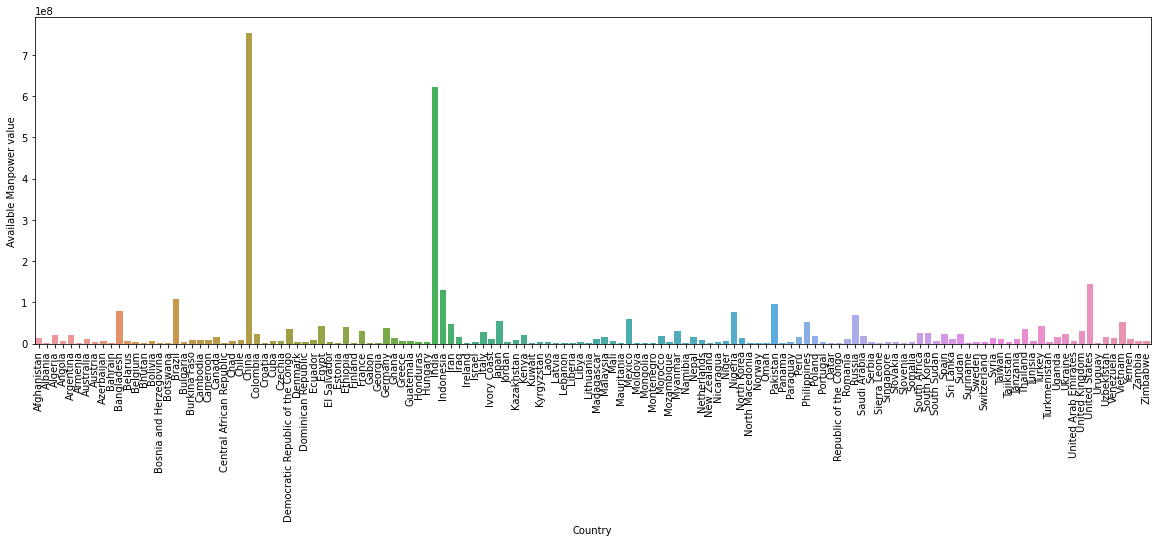

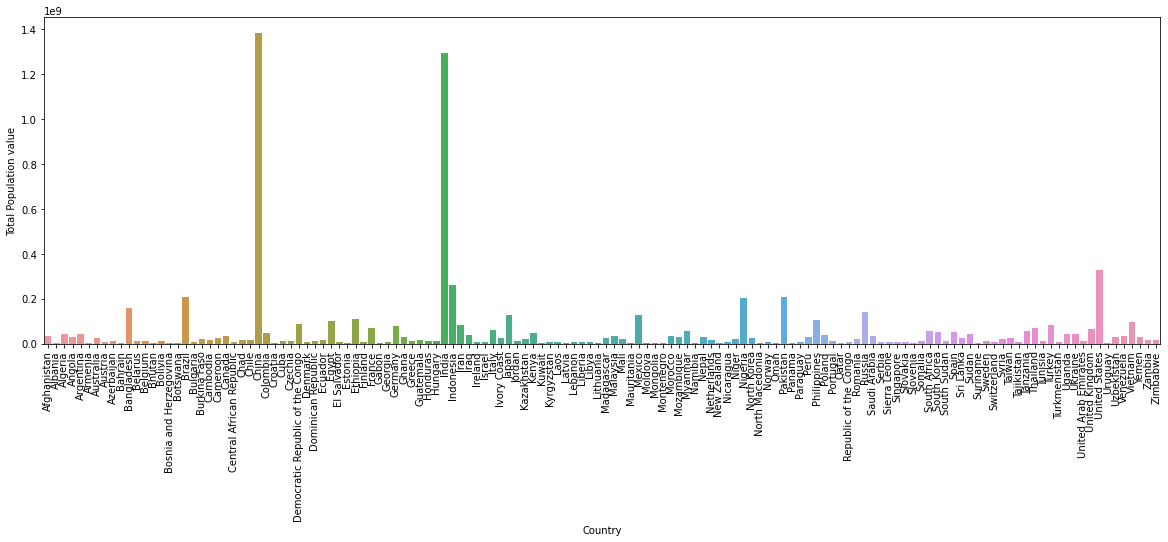

In [25]:
for col in df.columns[1:]:
    plt.figure(figsize = (20, 6))
    sns.barplot(data = df , y = df[col], x = df["Country"])
    plt.xticks(rotation = 90);

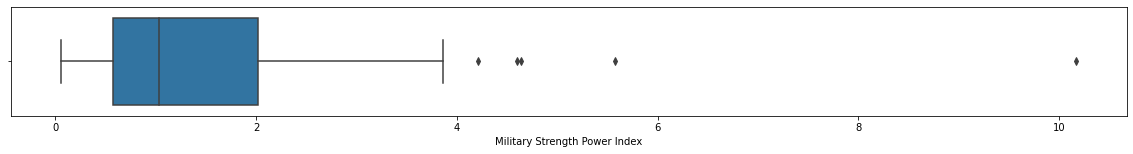

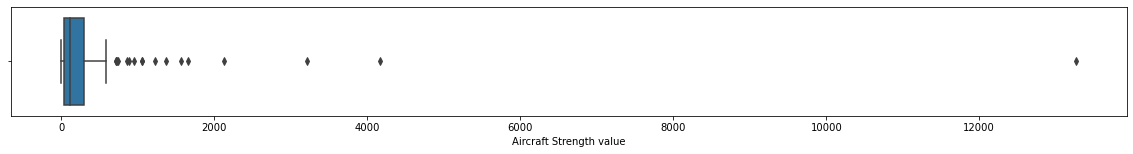

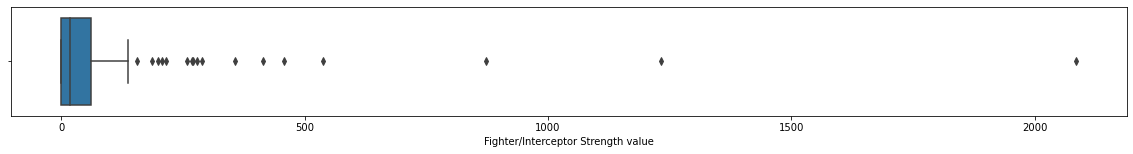

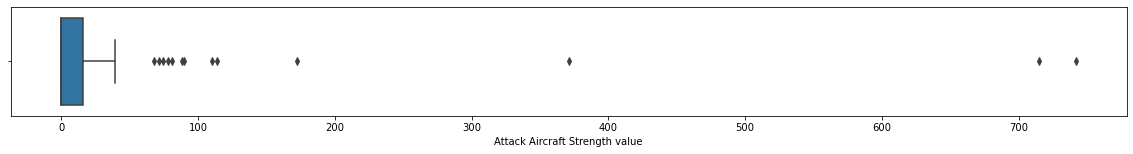

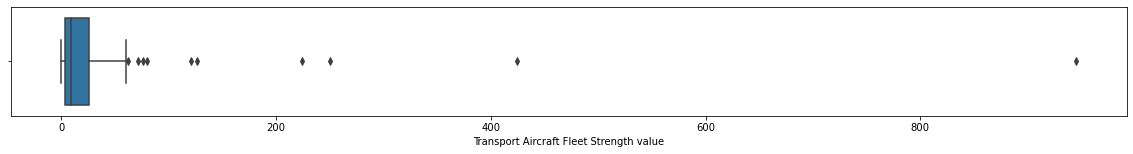

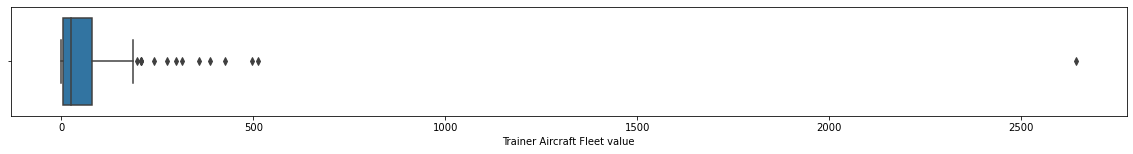

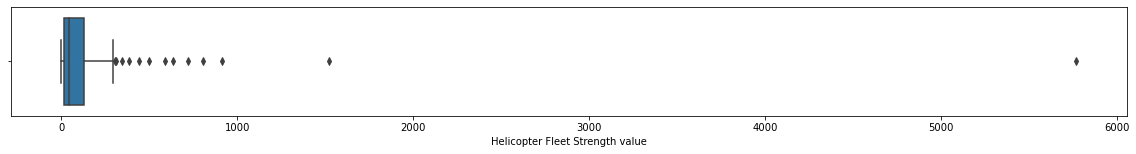

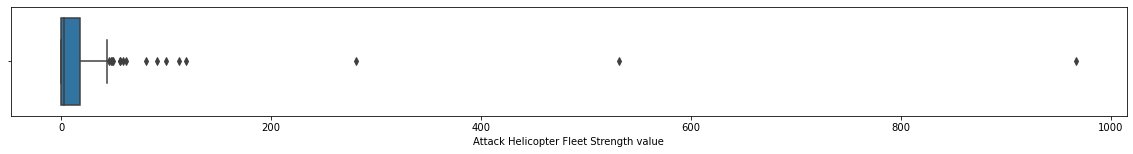

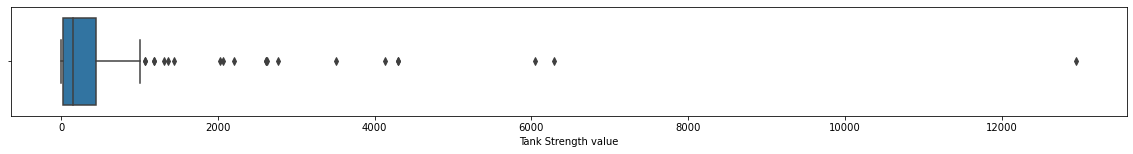

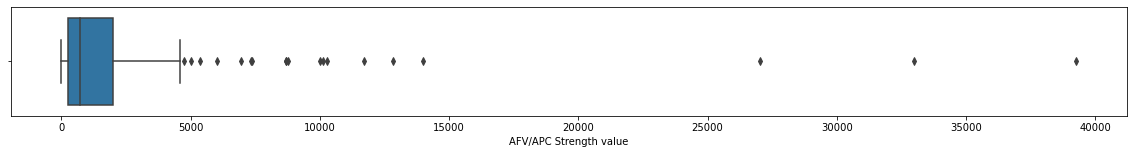

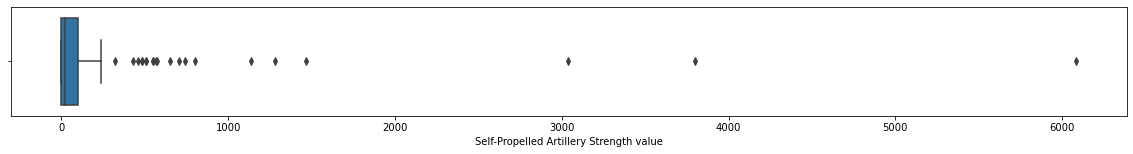

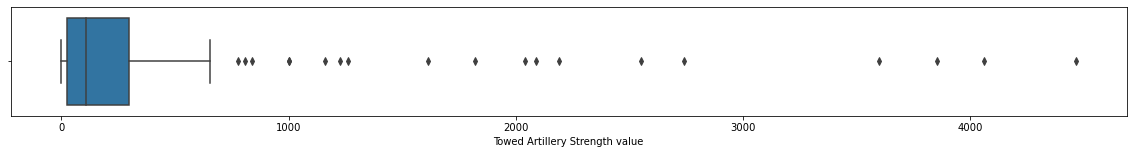

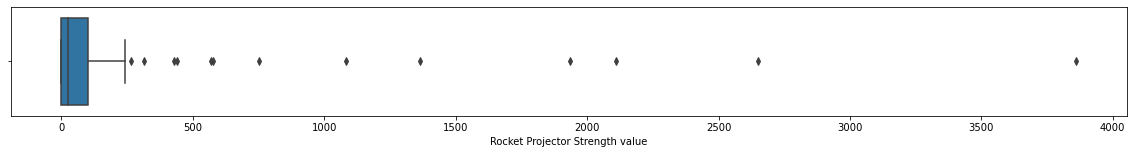

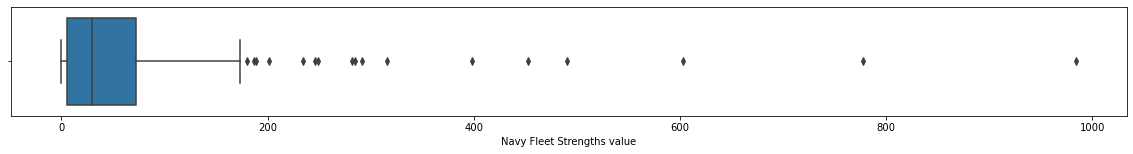

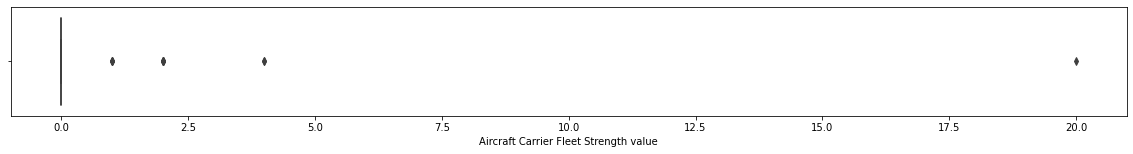

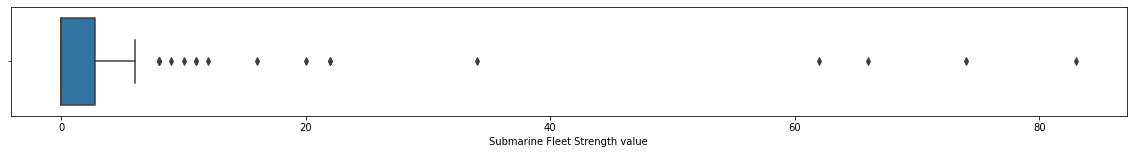

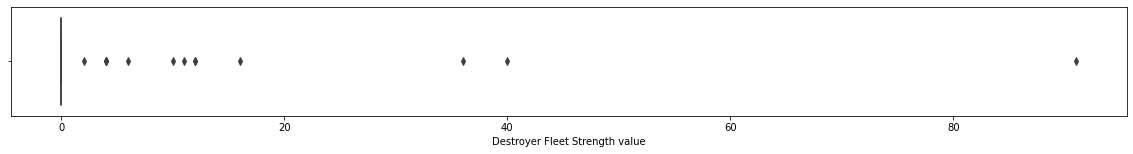

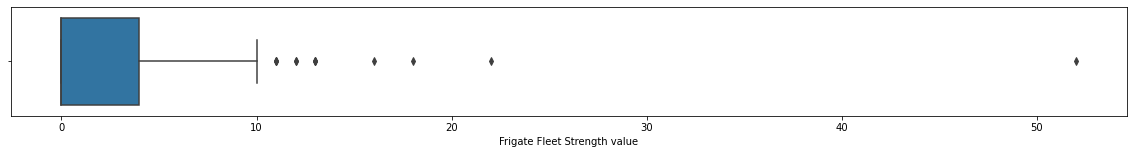

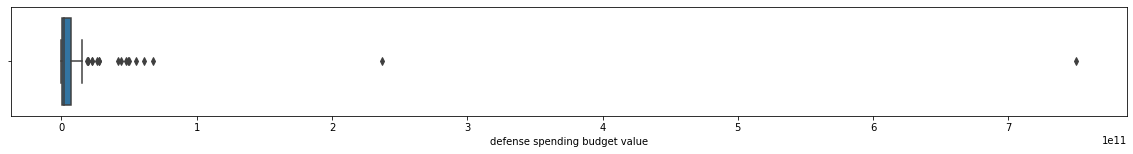

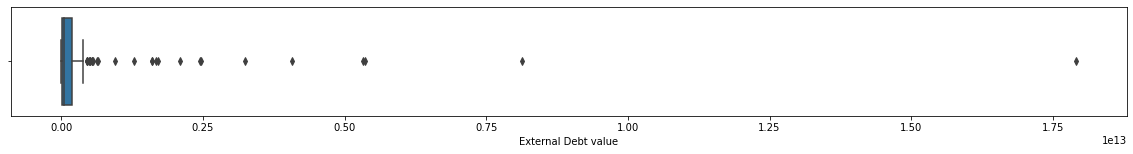

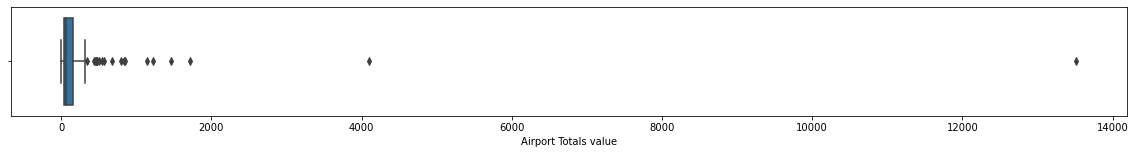

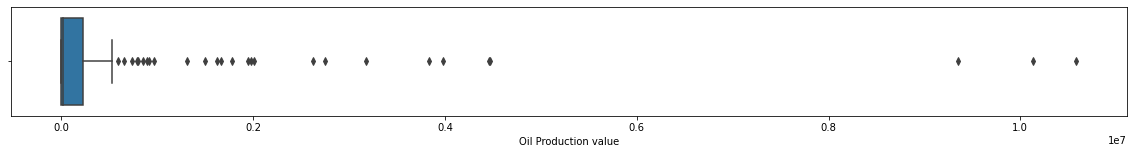

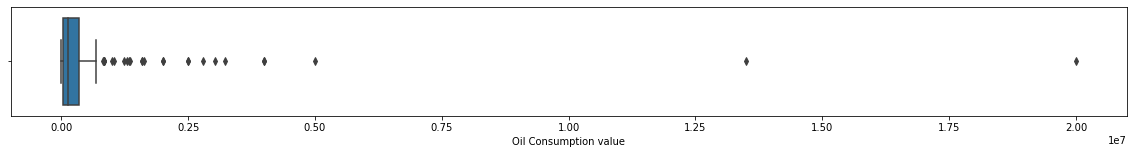

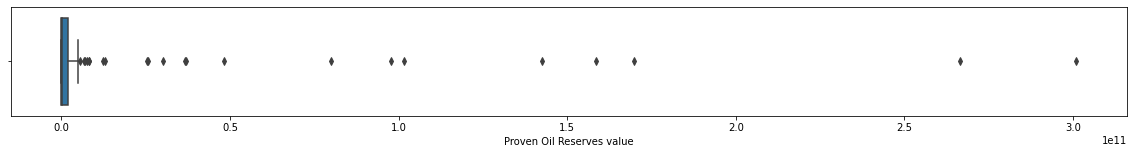

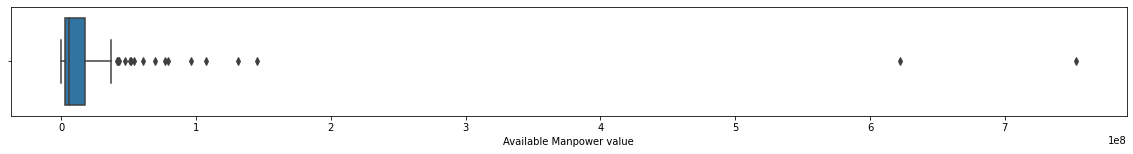

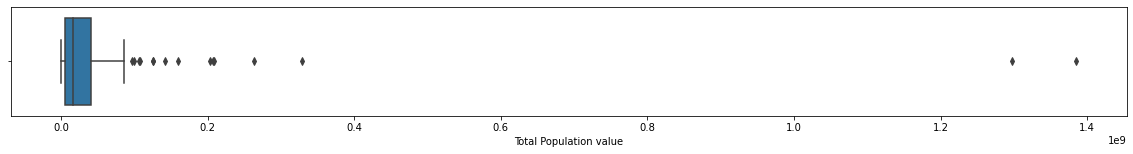

In [26]:
for col in df.columns[1:]:
    plt.figure(figsize = (20, 2))
    sns.boxplot(data = df, x =df[col])

## Decriptive statistics

In [27]:
df.describe().T

count          mean           std  \
Military Strength Power Index            138.0  1.460716e+00  1.324018e+00   
Aircraft Strength value                  138.0  3.884710e+02  1.231982e+03   
Fighter/Interceptor Strength value       138.0  8.156522e+01  2.303248e+02   
Attack Aircraft Strength value           138.0  2.576087e+01  9.452822e+01   
Transport Aircraft Fleet Strength value  138.0  3.023188e+01  9.233044e+01   
Trainer Aircraft Fleet value             138.0  8.283333e+01  2.408037e+02   
Helicopter Fleet Strength value          138.0  1.540652e+02  5.201836e+02   
Attack Helicopter Fleet Strength value   138.0  2.562319e+01  9.732609e+01   
Tank Strength value                      138.0  6.465652e+02  1.515464e+03   
AFV/APC Strength value                   138.0  2.485696e+03  5.410546e+03   
Self-Propelled Artillery Strength value  138.0  2.121594e+02  6.880290e+02   
Towed Artillery Strength value           138.0  3.939783e+02  8.057817e+02   
Rocket Projector Strength value          138.0  1.569348e+02  4.843810e+02   
Navy Fleet Strengths value               138.0  7.636232e+01  1.408220e+02   
Aircraft Carrier Fleet Strength value    138.0  3.188406e-01  1.804235e+00   
Submarine Fleet Strength value           138.0  4.159420e+00  1.271946e+01   
Destroyer Fleet Strength value           138.0  1.797101e+00  9.195492e+00   
Frigate Fleet Strength value             138.0  2.963768e+00  6.052579e+00   
defense spending budget value            138.0  1.399363e+10  6.731189e+10   
External Debt value                      138.0  5.194983e+11  1.847252e+12   
Airport Totals value                     138.0  2.900435e+02  1.212967e+03   
Oil Production value                     138.0  5.855524e+05  1.667139e+06   
Oil Consumption value                    138.0  7.020187e+05  2.168810e+06   
Proven Oil Reserves value                138.0  1.194412e+10  4.275090e+10   
Available Manpower value                 138.0  2.544297e+07  8.450698e+07   
Total Population value                   138.0  5.318058e+07  1.651090e+08   

                                                  min           25%  \
Military Strength Power Index            6.060000e-02  5.748000e-01   
Aircraft Strength value                  0.000000e+00  3.300000e+01   
Fighter/Interceptor Strength value       0.000000e+00  0.000000e+00   
Attack Aircraft Strength value           0.000000e+00  0.000000e+00   
Transport Aircraft Fleet Strength value  0.000000e+00  3.000000e+00   
Trainer Aircraft Fleet value             0.000000e+00  4.250000e+00   
Helicopter Fleet Strength value          0.000000e+00  1.525000e+01   
Attack Helicopter Fleet Strength value   0.000000e+00  0.000000e+00   
Tank Strength value                      0.000000e+00  1.925000e+01   
AFV/APC Strength value                   0.000000e+00  2.502500e+02   
Self-Propelled Artillery Strength value  0.000000e+00  0.000000e+00   
Towed Artillery Strength value           0.000000e+00  2.425000e+01   
Rocket Projector Strength value          0.000000e+00  0.000000e+00   
Navy Fleet Strengths value               0.000000e+00  5.250000e+00   
Aircraft Carrier Fleet Strength value    0.000000e+00  0.000000e+00   
Submarine Fleet Strength value           0.000000e+00  0.000000e+00   
Destroyer Fleet Strength value           0.000000e+00  0.000000e+00   
Frigate Fleet Strength value             0.000000e+00  0.000000e+00   
defense spending budget value            1.300000e+07  3.255000e+08   
External Debt value                      5.394000e+08  9.361500e+09   
Airport Totals value                     2.000000e+00  3.350000e+01   
Oil Production value                     0.000000e+00  0.000000e+00   
Oil Consumption value                    2.000000e+03  3.250000e+04   
Proven Oil Reserves value                0.000000e+00  0.000000e+00   
Available Manpower value                 1.327400e+05  2.618384e+06   
Total Population value                   5.979270e+05  5.819450e+06   

                

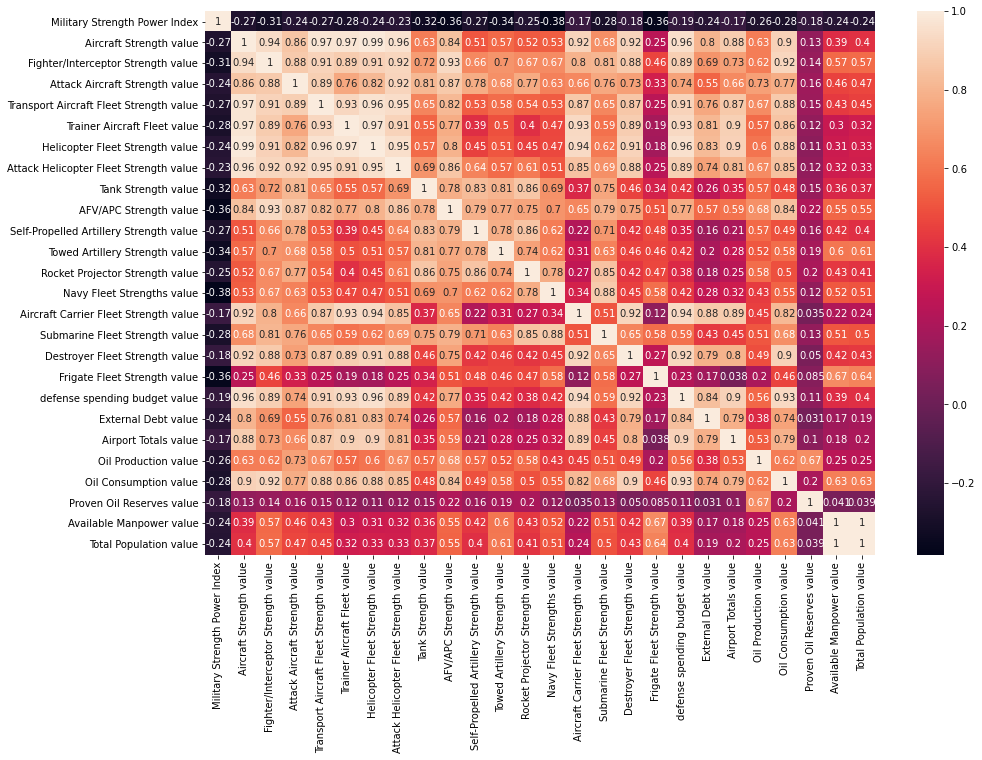

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

# Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustertend import hopkins

# Modelling

In [30]:
X= df.drop(["Country"], axis=1)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Hopkins Test 
**Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.**

In [32]:
hopkins(X_scaled, X_scaled.shape[0])

0.07635783522779553

## Clustering with K-means

In [33]:
ssd = []

K = range(2,10)

for k in K:
    model1 = KMeans(n_clusters =k, random_state=42)
    model1.fit(X_scaled)
    ssd.append(model1.inertia_)

In [34]:
ssd

[1913.4825726106826,
 1299.6122083433888,
 1043.6654853623909,
 885.8384131431537,
 743.6947848758044,
 609.8487829843649,
 511.87139844261316,
 449.9718773639555]

Text(0.5, 1.0, 'elbow method')

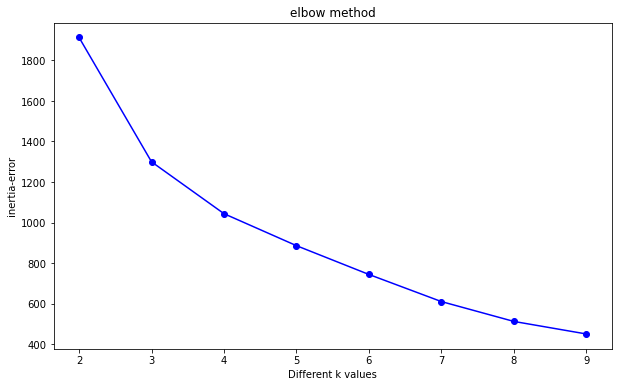

In [35]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

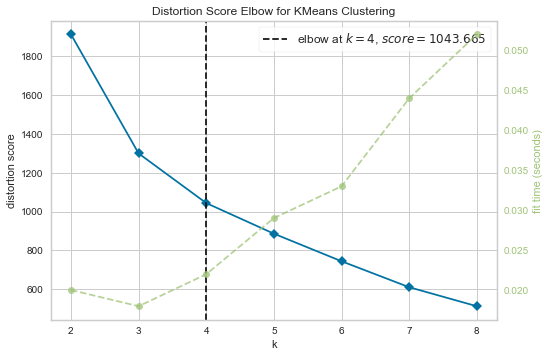

In [36]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [37]:
model2 = KMeans(n_clusters=4)
model2.fit(X_scaled)

KMeans(n_clusters=4)

In [38]:
model2.inertia_

1043.6654853623909

In [39]:
model2.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 3,
       3, 0, 0, 3, 3, 3])

In [40]:
df["cluster"] = model2.labels_

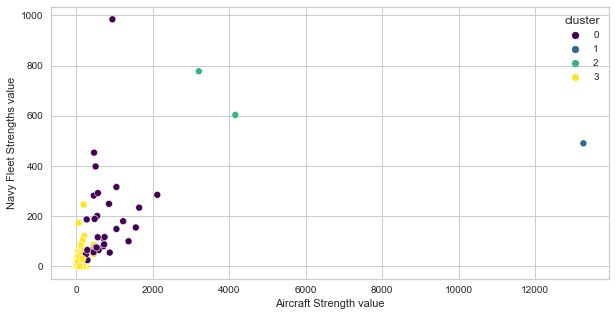

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Aircraft Strength value"], 
                df["Navy Fleet Strengths value"], hue= df["cluster"], palette= "viridis");

In [42]:
fig = px.scatter_3d(x=df["Aircraft Strength value"],
                   y=df["defense spending budget value"],
                   z=df["External Debt value"],
                   color=df.cluster,
                   labels = {"x": "Aircraft Strength value",
                             "y": "defense spending budget value",
                             "z": "External Debt value"},
                   hover_name=df["Country"])

fig.show()

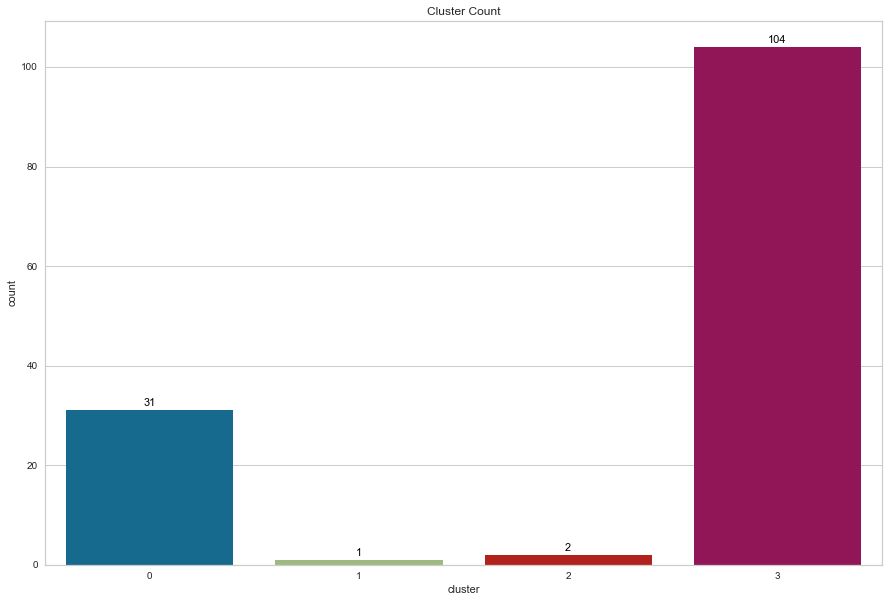

In [43]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

### Evaluate 

In [44]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, df["cluster"])

0.48715561540180047

In [45]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8633678242036664
For n_clusters=3, the silhouette score is 0.8178018574437472
For n_clusters=4, the silhouette score is 0.48715561540180047
For n_clusters=5, the silhouette score is 0.5097353358281169
For n_clusters=6, the silhouette score is 0.5106565661439438
For n_clusters=7, the silhouette score is 0.4761723268387499
For n_clusters=8, the silhouette score is 0.4663736308553614


## Hierarchical Clustering

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.

### Dendogram

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [47]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

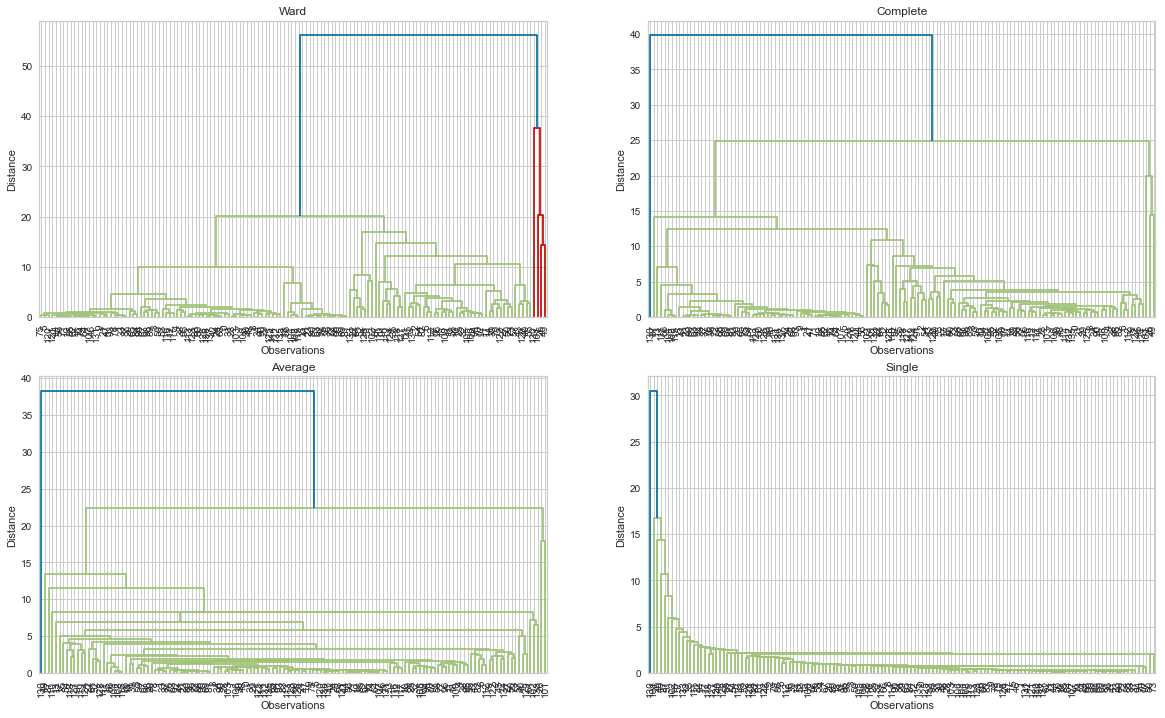

In [48]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);
# Dendogramı çizdirmek için dört yöntem var
# Ward en kalteli clusterı oluşturuyor.Cluster içindeki varyansları min., clusterlar arası mesafeyi max yaparak çiziyor
# hc_ward = z parametresi
# Bu parametre dendogramı oluşturuyor

### Model Building and label visualisation

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
model4 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model4.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
df["cluster_hr"] = model4.labels_

In [52]:
fig = px.scatter_3d(x=df["Aircraft Strength value"],
                    y=df["defense spending budget value"],
                    z=df["External Debt value"],
                    color=df["cluster_hr"],
                    labels = {"x":"Aircraft Strength value",
                              "y": "defense spending budget value",
                              "z": "External Debt value"},
                    hover_name=df["Country"])

fig.show()

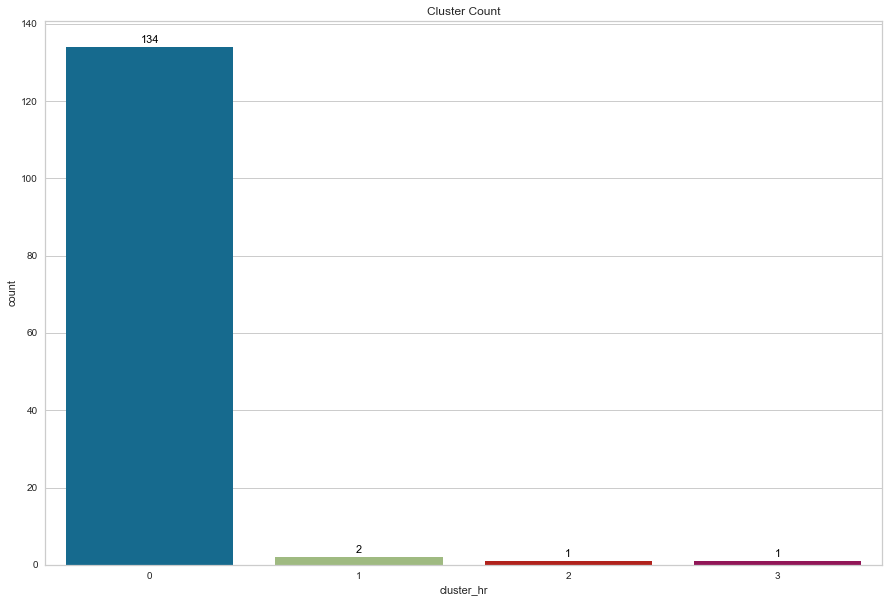

In [53]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df["cluster_hr"])

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

### Evaluate 

In [54]:
silhouette_score(X_scaled, df["cluster_hr"])

0.8064895375260924